### 2. Limpieza y Normalización de Datos

In [35]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
print(plt.style.available)


plt.style.use('seaborn-v0_8')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [44]:
# Ruta al archivo CSV
laptop = pd.read_csv("../data/laptop_prices.csv")

In [45]:
# Verificamos si hay valores nulos en el dataset
null_counts = laptop.isnull().sum()
null_percentage = (laptop.isnull().mean() * 100).round(2)

pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje (%)': null_percentage
}).sort_values(by='Porcentaje (%)', ascending=False)

,Valores Nulos,Porcentaje (%)
Price_log,234,18.35
Inches,0,0.00
Ram,0,0.00
OS,0,0.00
Product,0,0.00
Price_euros,0,0.00
Screen,0,0.00
ScreenW,0,0.00
ScreenH,0,0.00
Touchscreen,0,0.00


#### Se utilizó el método del Rango Intercuartílico (IQR) para identificar los valores atípicos en la columna "Price_euros" del conjunto de datos de laptops. El proceso consistió en:

Calcular los cuartiles (Q1 y Q3) y el Rango Intercuartílico (IQR).

Establecer los límites inferior y superior utilizando la fórmula:

Límite inferior = Q1 - 1.5 × IQR

Límite superior = Q3 + 1.5 × IQR

Filtrar los datos para identificar los registros que superan los límites establecidos, considerados como valores atípicos.

El número total de valores atípicos encontrados en la columna "Price_euros" fue determinado, lo cual aporta información valiosa para comprender la presencia de laptops con precios extremos, ya sea por ser modelos muy económicos o de gama alta.

In [46]:
Q1 = laptop['Price_euros'].quantile(0.25)
Q3 = laptop['Price_euros'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = laptop[(laptop['Price_euros'] < lower_limit) | (laptop['Price_euros'] > upper_limit)]

print(f"Cantidad de valores atípicos detectados en 'Price_euros': {outliers.shape[0]}")


Cantidad de valores atípicos detectados en 'Price_euros': 0


### Estrategias para el Tratamiento de Valores Atípicos

- Transformación logarítmica: Es adecuada para datos que siguen una distribución exponencial, ya que mantiene el orden de los datos sin eliminar valores extremos.
- Winsorization:Es útil cuando se desea mantener los valores originales, pero limitando los valores atípicos a un rango aceptable.

c:\Users\Sebas\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


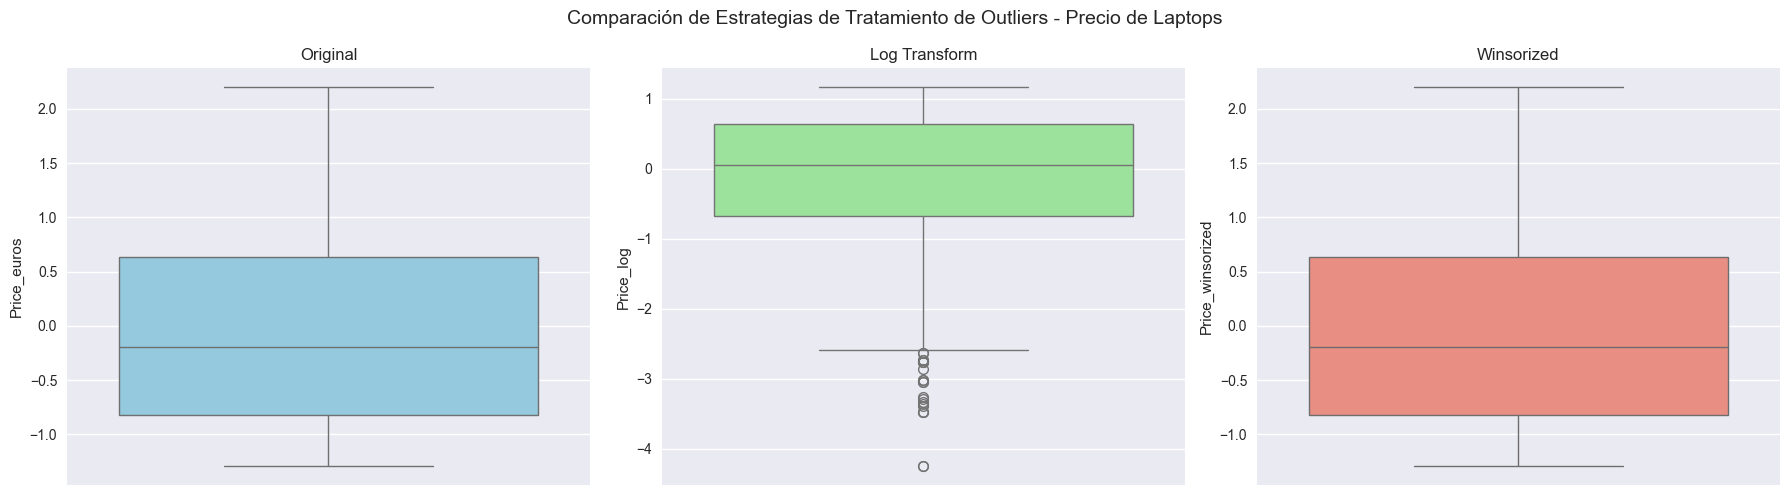

In [47]:

# Opción 1: Transformación logarítmica
laptop['Price_log'] = np.log1p(laptop['Price_euros'])

# Opción 2: Winsorization
laptop['Price_winsorized'] = winsorize(laptop['Price_euros'], limits=[0.05, 0.05])

# Comparación visual con boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=laptop['Price_euros'], ax=axes[0], color='skyblue').set_title('Original')
sns.boxplot(y=laptop['Price_log'], ax=axes[1], color='lightgreen').set_title('Log Transform')
sns.boxplot(y=laptop['Price_winsorized'], ax=axes[2], color='salmon').set_title('Winsorized')

plt.suptitle('Comparación de Estrategias de Tratamiento de Outliers - Precio de Laptops', fontsize=14)
plt.tight_layout()
plt.show()


###  Normalización

 El proceso de normalización garantiza que las características con diferentes escalas por ejemplo, "Inches" podra tener valores entre 0 y 20, mientras que "CPU_freq" podría tener un rango mucho más ampli no dominen el modelo de aprendizaje automático debido a su magnitud. Esto es crucial porque muchos algoritmos de machine learning, como la regresión logística, SVMs o redes neuronales, son sensibles a la escala de las características.

In [48]:
# Seleccionar las columnas numéricas que deseas normalizar
numerical_columns = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage', 'Price_euros']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la normalización a las columnas seleccionadas
laptop[numerical_columns] = scaler.fit_transform(laptop[numerical_columns])

# Verificar el resultado
print(laptop[numerical_columns].head())

     Inches       Ram    Weight   ScreenW   ScreenH  CPU_freq  PrimaryStorage  \
0 -1.205746 -0.086499 -1.002380  1.338239  1.853934 -0.005918       -0.866236   
1 -1.205746 -0.086499 -1.047227 -0.932863 -0.612830 -0.998674       -0.866236   
2  0.403873 -0.086499 -0.269871  0.040466  0.021481  0.391185       -0.515929   
3  0.263906  1.483418 -0.314718  1.987125  2.558724  0.788288        0.184684   
4 -1.205746 -0.086499 -1.002380  1.338239  1.853934  1.582493       -0.515929   

   SecondaryStorage  Price_euros  
0         -0.423449     0.377923  
1         -0.423449    -0.345616  
2         -0.423449    -0.877399  
3         -0.423449     2.198976  
4         -0.423449     1.139482  


In [49]:
laptop.to_csv('../data/laptop_prices.csv', index=False)
print("Datos limpios guardados exitosamente.")

Datos limpios guardados exitosamente.
